# Tarea 1 Machine Learning - Métodos Lineales para Regresión

Juan Pablo Muñoz - 201373522-3 

Margarita Bugueño Pérez - 201373510-K

## 5. Detectar enfermedades cardíacas

El dataset contiene 13 atributos en lugar de las 75 que se consideran en el dataset original.  
Estas corresponden a:  

-- 1. age       
-- 2. sex       
-- 3. chest pain type  (4 values)       
-- 4. resting blood pressure  
-- 5. serum cholestoral in mg/dl      
-- 6. fasting blood sugar > 120 mg/dl       
-- 7. resting electrocardiographic results  (values 0,1,2) 
-- 8. maximum heart rate achieved  
-- 9. exercise induced angina    
-- 10. oldpeak = ST depression induced by exercise relative to rest   
-- 11. the slope of the peak exercise ST segment     
-- 12. number of major vessels (0-3) colored by flourosopy        
-- 13.  thal: 3 = normal; 6 = fixed defect; 7 = reversable defect   

Y el último atributo, 'normal', que es 1=sano y 2=enfermo para dicho paciente.

#### a. Cargar el dataset

In [1]:
import pandas as pd

headers = ['age','sex','chest_pain','blood_p','serum','blood_s','electro','max_heart', \
               'angina','oldpeak','slope','vessel','thal','normal']

df = pd.read_csv('heart.dat', header=None, names=headers, sep=' ')

df.head()

,age,sex,chest_pain,blood_p,serum,blood_s,electro,max_heart,angina,oldpeak,slope,vessel,thal,normal
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


Se observa la serie de datos 'max_heart' con un boxplot para conocer cómo está distribuida y para identificar outliers.

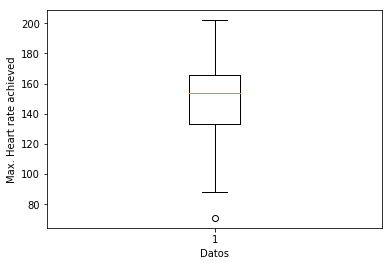

In [2]:
import matplotlib.pyplot as plt

plt.clf()

plt.boxplot(list(df['max_heart']))
plt.xlabel('Datos')
plt.ylabel('Max. Heart rate achieved')

plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.clf()

plt.boxplot(list(df['max_heart']))
plt.xlabel('Datos')
plt.ylabel('Max. Heart rate achieved')

plt.show()

Los outliers son aquellos puntos $x = max\_heart$ fuera del rango abarcado por los bigotes, lo que es igual a estar fuera del intervalo $[\bar{x}-2.698\sigma, \bar{x}+2.698\sigma]$ en una distribución normal. Estadísticamente, se espera que el $0.71\%$ de los pacientes queden fuera del rango y sean outliers. Dada la baja cantidad de datos disponibles, se decide relajar la condición para considerarse outlier a aquellos puntos $x$ fuera del intervalo $[\bar{x}-2\sigma, \bar{x}+2\sigma]$, con lo que se espera que el $4.56\%$ de los pacientes observados sean atípicos y posibles enfermos cardíacos. Notar que esta decisión se basa únicamente en el hecho de que $max\_heart$ sea un atípico de acuerdo al criterio definido, el cual incluye tanto pacientes con un muy alto ritmo cardíaco como a los con uno muy bajo.

In [3]:
def categorizar(vector_continuo):
    vector_clasificaciones = []
    for x in list(vector_continuo):
        if x < np.mean(vector_continuo) - 2*np.std(vector_continuo):
            vector_clasificaciones.append(1)
        elif x > np.mean(vector_continuo) + 2*np.std(vector_continuo):
            vector_clasificaciones.append(1)
        else:
            vector_clasificaciones.append(0)
    return vector_clasificaciones

In [4]:
import numpy as np

cantidad_outliers = sum(categorizar(df['max_heart']))

print('Cantidad outliers bajo nuevo criterio:',cantidad_outliers)

('Cantidad outliers bajo nuevo criterio:', 10)


De acuerdo al criterio establecido, a partir de los datos, serían 10 pacientes los catalogados como outliers, siendo considerados enfermos (anteriormente sólo existía uno; el único del boxplot anterior). Entonces, se debe aplicar el mismo criterio sobre el modelo de regresión lineal que se va a crear. La idea es que la salida del modelo sea transformada de una continua a una del tipo categórica, con las clases {1=enfermo, 0=sano}. Así, una predicción será correcta si tanto el max_heart predicho como el real resultan ser outliers de sus respectivas series de datos.

Escalado y estandarización de los atributos.

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

Creación de la matriz de datos de entrada $X$ (todos los atributos excepto 'max_heart') y vector de salidas esperadas $Y$ (columna 'max_heart').

In [6]:
X = df.drop('max_heart', 1)
Y = df['max_heart']

Creación del conjunto de entrenamiento $(X_{train}, Y_{train})$ y el conjunto de pruebas $(X_{test}, Y_{test})$ con el 70% y el 30% de los datos, respectivamente.

In [7]:
corte = int(0.7*len(X))

Xtrain = X[:corte]
Ytrain = Y[:corte]
Xtest = X[corte:]
Ytest = Y[corte:]

Categorización de los vectores $Y_{train}$ e $Y_{test}$.

In [8]:
Ytrain_categorical = categorizar(Ytrain)
Ytest_categorical = categorizar(Ytest)

#### b. Regresión lineal

Generar el modelo de regresión lineal usando $(X_{train}, Y_{train})$.

In [9]:
import sklearn.linear_model as lm

Xtrain.insert(Xtrain.shape[1], 'intercept', np.ones(Xtrain.shape[0]))
Xtest.insert(Xtest.shape[1], 'intercept', np.ones(Xtest.shape[0]))
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain, Ytrain)
linreg.coef_.reshape((-1,1))

array([[ -9.96931906e-01],
       [ -1.98465621e+00],
       [ -2.34084053e+00],
       [  1.46459480e-01],
       [  3.04850425e-02],
       [  4.59663205e+00],
       [  5.92905711e-01],
       [ -9.92553889e+00],
       [ -1.25678660e+00],
       [ -8.20844117e+00],
       [ -4.79013456e-01],
       [  6.87534645e-01],
       [ -8.28228065e+00],
       [  2.09934680e+02]])

In [10]:
from sklearn.metrics import accuracy_score

yhat_train = linreg.predict(Xtrain)
yhat_test = linreg.predict(Xtest)

yhat_train_categorical = categorizar(yhat_train)
yhat_test_categorical = categorizar(yhat_test)


print("Training Score:",round((accuracy_score(Ytrain_categorical,yhat_train_categorical)),4))
print("Test Score: ",round((accuracy_score(Ytest_categorical,yhat_test_categorical)),4))

('Training Score:', 0.9524)
('Test Score: ', 0.9506)


En promedio, un $93\%$ de las predicciones resultaron correctas. Si se revisan los casos de enfermedad:

In [11]:
print('nº : y_true , y_pred')
for i in range(len(Ytrain_categorical)):
    if(Ytrain_categorical[i] == 1):
        print(i,':', Ytrain_categorical[i],',', yhat_train_categorical[i])

nº : y_true , y_pred
(57, ':', 1, ',', 0)
(101, ':', 1, ',', 0)
(122, ':', 1, ',', 0)
(126, ':', 1, ',', 0)
(133, ':', 1, ',', 1)
(145, ':', 1, ',', 0)


Sólo acertó a un caso, siendo el resto falsos negativos. Si se examinan los positivos de enfermedad predichos:

In [13]:
print('nº : y_true , y_pred')
for i in range(len(Ytrain_categorical)):
    if(yhat_train_categorical[i] == 1):
        print(i,':', Ytrain_categorical[i],',', yhat_train_categorical[i])

nº : y_true , y_pred
(20, ':', 0, ',', 1)
(133, ':', 1, ',', 1)
(138, ':', 0, ',', 1)
(172, ':', 0, ',', 1)
(174, ':', 0, ',', 1)


Siendo 4 los falsos positivos. Del conjunto de pruebas se hace el mismo análisis.

In [12]:
print('nº : y_true , y_pred')
for i in range(len(Ytest_categorical)):
    if(Ytest_categorical[i] == 1):
        print(i,':', Ytest_categorical[i],',', yhat_test_categorical[i])

nº : y_true , y_pred
(0, ':', 1, ',', 0)
(25, ':', 1, ',', 1)
(37, ':', 1, ',', 0)
(80, ':', 1, ',', 0)


Sólo se acerta a un caso, con 3 falsos negativos.

In [14]:
print('nº : y_true , y_pred')
for i in range(len(Ytest_categorical)):
    if(yhat_test_categorical[i] == 1):
        print(i,':', Ytest_categorical[i],',', yhat_test_categorical[i])

nº : y_true , y_pred
(2, ':', 0, ',', 1)
(25, ':', 1, ',', 1)


Habiendo sólo un falso positivo.

De los 10 casos de enfermedad, sólo se detectó 2 correctamente, existiendo 8 casos de falsos negativos. Además, el modelo de regresión diagnosicó como enfermos erróneamente a 5 pacientes, por lo que hubo 5 falsos positivos. El $93\%$ de precisión obtenido anteriormente es, por lo tanto, una métrica engañosa.


### (discutir resultado y proponer otro método)

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

headers = ['age','sex','chest_pain','blood_p','serum','blood_s','electro','max_heart', \
               'angina','oldpeak','slope','vessel','thal','normal']
df = pd.read_csv('heart.dat', header=None, names=headers, sep=' ')
df.head()

,age,sex,chest_pain,blood_p,serum,blood_s,electro,max_heart,angina,oldpeak,slope,vessel,thal,normal
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [3]:
df.describe()

,age,sex,chest_pain,blood_p,serum,blood_s,electro,max_heart,angina,oldpeak,slope,vessel,thal,normal
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [16]:
enfermos=[]
no_enfermos=[]
index_enfermos=[]
index_no_enfermos=[]
for i, reg in enumerate(df['normal']):
    if reg==2:
        index_enfermos.append(i)
        enfermos.append(df['max_heart'][i])
    else: 
        index_no_enfermos.append(i)
        no_enfermos.append(df['max_heart'][i])

print (len(enfermos))
print (len(no_enfermos))

120
150


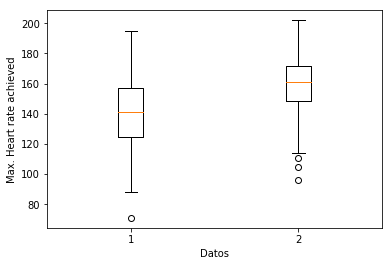

In [19]:
import matplotlib.pyplot as plt

plt.clf()

plt.boxplot([enfermos, no_enfermos])
plt.xlabel('Datos')
plt.ylabel('Max. Heart rate achieved')
plt.show()

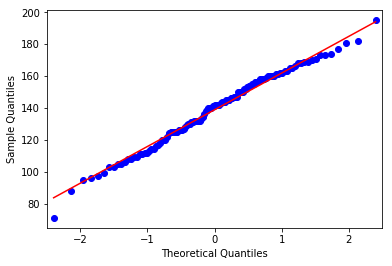

In [22]:
import statsmodels.api as sm
import numpy as np
import pylab
pylab.clf
sm.qqplot(np.asarray(enfermos), line='s')

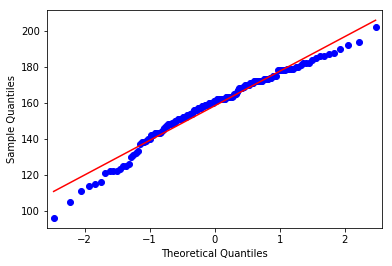

In [23]:
pylab.clf
sm.qqplot(np.asarray(no_enfermos), line='s')

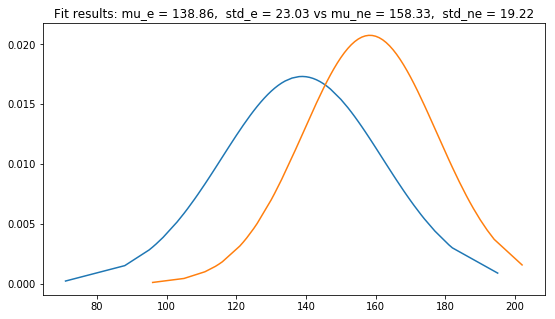

In [53]:
from scipy.stats import norm
plt.clf
plt.figure(figsize=(9,5))
enfermos.sort()
e_mean = np.mean(enfermos)
e_std = np.std(enfermos)
pdf = norm.pdf(enfermos, e_mean, e_std)
plt.plot(enfermos, pdf) # including h here is crucial
#plt.show()

no_enfermos.sort()
ne_mean = np.mean(no_enfermos)
ne_std = np.std(no_enfermos)
ne_pdf = norm.pdf(no_enfermos, ne_mean, ne_std)
plt.plot(no_enfermos, ne_pdf) # including h here is crucial
ne_title = "Fit results: mu_e = %.2f,  std_e = %.2f vs mu_ne = %.2f,  std_ne = %.2f" % (e_mean, e_std, ne_mean, ne_std)
plt.title(ne_title)
plt.show()


Se obtiene entonces que las características de los datos son:  

\begin{align}
    \textbf{Conjunto de enfermos}: \mu_{e}= 138.86,  \sigma_{e}=23.03
\end{align}
\begin{align}
    \textbf{Conjunto de no enfermos}: \mu_{ne}= 158.33,  \sigma_{ne}=19.22 
\end{align}

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)



In [63]:
X = df_scaled.drop('max_heart', 1)
N = X.shape[0]
X.insert(X.shape[1], 'intercept', np.ones(N))
Y = df_scaled['max_heart']
print (X.head())
X.shape


        age       sex  chest_pain   blood_p     serum   blood_s   electro  \
0  1.712094  0.689500    0.870928 -0.075410  1.402212 -0.417029  0.981664   
1  1.382140 -1.450327   -0.183559 -0.916759  6.093004 -0.417029  0.981664   
2  0.282294  0.689500   -1.238045 -0.411950  0.219823 -0.417029 -1.026285   
3  1.052186  0.689500    0.870928 -0.187590  0.258589 -0.417029 -1.026285   
4  2.152032 -1.450327   -1.238045 -0.636310  0.374890 -0.417029  0.981664   

     angina   oldpeak     slope    vessel      thal    normal  intercept  
0 -0.701222  1.181012  0.676419  2.472682 -0.875706  1.118034        1.0  
1 -0.701222  0.481153  0.676419 -0.711535  1.189277 -0.894427        1.0  
2 -0.701222 -0.656118 -0.954234 -0.711535  1.189277  1.118034        1.0  
3  1.426081 -0.743600  0.676419  0.349871  1.189277 -0.894427        1.0  
4  1.426081 -0.743600 -0.954234  0.349871 -0.875706 -0.894427        1.0  


(270, 14)

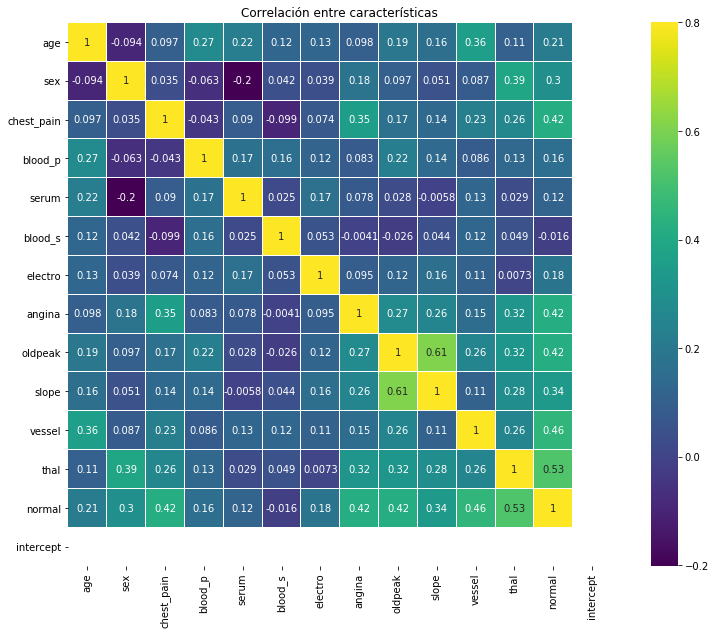

In [79]:
plt.figure(figsize=(14,10))
sns.heatmap(X.corr(), vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
sns.set(font_scale=1)
plt.title('Correlación entre características');
plt.show()

In [72]:
import sklearn.linear_model as lm
#mascara estatica con el 70% de los datos
mascara = np.zeros(len(X))
limit = int(len(X)*0.7)
mascara[:limit] = 1
istrain = mascara== 1
Xtrain = X[istrain]
Ytrain = Y[istrain]
Xtest = X[np.logical_not(istrain)]
Ytest = Y[np.logical_not(istrain)]
linreg_heart = lm.LinearRegression(fit_intercept = False)
linreg_heart.fit(Xtrain, Ytrain)
beta= linreg_heart.coef_.reshape(-1,1)

In [73]:
print (beta.shape)
beta

(14, 1)


array([[-0.39200682],
       [-0.0401113 ],
       [-0.09600434],
       [ 0.11292557],
       [ 0.06801677],
       [ 0.07062035],
       [ 0.02554013],
       [-0.20178302],
       [-0.06212993],
       [-0.21770027],
       [-0.01951759],
       [ 0.05759676],
       [-0.1779846 ],
       [-0.05660334]])

In [78]:
Max_heart_est= linreg_heart.predict(Xtrain)
print (Xtrain.shape)
Max_heart_est

(189, 14)


array([ -1.13337551e+00,  -1.01683380e-02,   1.10095870e-01,
        -8.07546079e-01,  -7.05812339e-01,  -2.20622004e-01,
        -5.17540565e-01,  -1.09888253e+00,  -4.72246297e-01,
        -4.75025626e-01,  -1.52204132e-01,   1.44474520e-01,
         9.43257210e-01,  -5.73758147e-01,   3.60289034e-01,
        -1.02021954e+00,  -3.58057801e-01,  -9.36392359e-01,
        -8.20310268e-01,   8.33029716e-01,  -1.49045424e+00,
         4.56013411e-01,   3.44937685e-01,   4.37737141e-01,
         4.67202324e-01,   7.83871805e-01,   5.52554633e-02,
         6.47097886e-01,  -5.95134989e-01,  -1.07400298e-01,
        -3.37854029e-01,  -2.48597649e-02,   1.12656035e+00,
        -1.05799604e+00,  -5.09890043e-01,   1.22765256e-01,
        -7.20334159e-01,   3.17598941e-01,   8.42351523e-01,
         5.38412059e-01,   7.84133889e-01,  -3.51171584e-02,
         3.75002387e-01,   9.27583686e-01,  -4.31313741e-01,
         5.06802046e-01,   1.11359698e-02,   2.22999851e-01,
        -9.29512827e-01,

### Definición de umbral para clasificación

Dado que blaa... haremos lo de las desviaciones con distribución normal ...explicar :)

In [ ]:
from sklearn.metrics import accuracy_score

yhat_train = linreg.predict(Xtrain)
yhat_test = linreg.predict(Xtest)

yhat_train_categorical = categorizar(yhat_train)
yhat_test_categorical = categorizar(yhat_test)


print("Training Score:",round((accuracy_score(Ytrain_categorical,yhat_train_categorical)),4))
print("Test Score: ",round((accuracy_score(Ytest_categorical,yhat_test_categorical)),4))